In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly


The input to Prohet is two columns: `ds` and `y`. `ds` can be datestamp or timestamp and `y` is the numeric measurement we wish to forecast.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


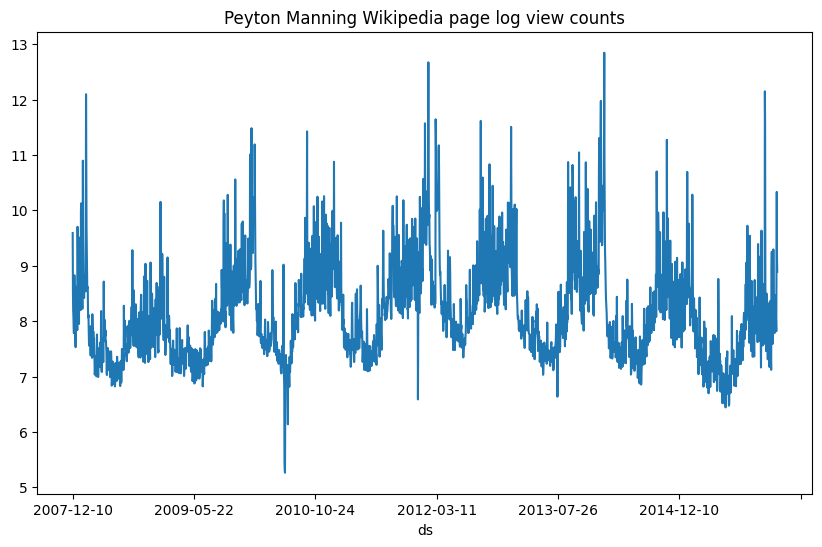

In [4]:
df.plot(x='ds', y='y', figsize=(10, 6), legend=False)
plt.title('Peyton Manning Wikipedia page log view counts')
plt.show()

Prophet is similar to `sklearn` model API. We have to create model instance and we have access to `fit` and `predict` methods.

In [5]:
m = Prophet()
m.fit(df)

12:42:19 - cmdstanpy - INFO - Chain [1] start processing
12:42:20 - cmdstanpy - INFO - Chain [1] done processing


Here we use available helper function and create dataframe containting dates for prediction

In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)

In [8]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203190,7.542863,8.951073
3266,2017-01-16,8.528195,7.828233,9.227176
3267,2017-01-17,8.315591,7.630785,9.056166
3268,2017-01-18,8.148199,7.450069,8.873311
3269,2017-01-19,8.160106,7.442229,8.886258


In [11]:
plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)

https://facebook.github.io/prophet/docs/trend_changepoints.html